# Pre-processing

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

### Load Data

In [17]:
df = pd.read_csv('data/anime_df.csv', index_col=0)
df.head()

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri,views_without_review,rating_counts
0,32281,Kimi no Na wa.,Movie,1,9.37,200630,0,0,0,0,...,0,0,0,1,0,0,0,0,238,1961
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,3080,21494
2,28977,Gintama°,TV,51,9.25,114262,1,0,0,1,...,0,0,0,0,0,0,0,0,198,1188
3,9253,Steins;Gate,TV,24,9.17,673572,0,0,0,0,...,0,0,0,0,1,0,0,0,2132,17151
4,9969,Gintama&#039;,TV,51,9.16,151266,1,0,0,1,...,0,0,0,0,0,0,0,0,558,3115


### Get Dummy

In [18]:
df_dummy = pd.get_dummies(df, columns=['type'], prefix="type", dtype='int')
df_dummy.head()

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Yaoi,Yuri,views_without_review,rating_counts,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0,...,0,0,238,1961,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,1,1,0,0,0,...,0,0,3080,21494,0,0,0,0,0,1
2,28977,Gintama°,51,9.25,114262,1,0,0,1,0,...,0,0,198,1188,0,0,0,0,0,1
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,0,...,0,0,2132,17151,0,0,0,0,0,1
4,9969,Gintama&#039;,51,9.16,151266,1,0,0,1,0,...,0,0,558,3115,0,0,0,0,0,1


### Normalize

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler_columns = ['episodes', 'members', 'views_without_review', 'rating_counts']
scaler = MinMaxScaler()

# Fit and transform the data
scaled_episodes, scaled_members, scaled_views_without_review, scaled_rating_counts = scaler.fit_transform(df_dummy[scaler_columns]).T
df_dummy['scaled_episodes'] = scaled_episodes
df_dummy['scaled_members'] = scaled_members
df_dummy['scaled_views_without_review'] = scaled_views_without_review
df_dummy['scaled_rating_counts'] = scaled_rating_counts
df_dummy = df_dummy.drop(columns=['anime_id', 'name', 'episodes', 'members', 'views_without_review', 'rating_counts'])
df_dummy.head()

,rating,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,scaled_episodes,scaled_members,scaled_views_without_review,scaled_rating_counts
0,9.37,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0.000000,0.197867,0.046539,0.057268
1,9.26,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0.034673,0.782769,0.602268,0.627991
2,9.25,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0.027518,0.112683,0.038717,0.034682
3,9.17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.012658,0.664323,0.416895,0.501096
4,9.16,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0.027518,0.149180,0.109112,0.090986


In [22]:
df_dummy.columns

Index(['rating', 'Action', 'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons',
       'Drama', 'Ecchi', 'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical',
       'Horror', 'Josei', 'Kids', 'Magic', 'Martial Arts', 'Mecha', 'Military',
       'Music', 'Mystery', 'Parody', 'Police', 'Psychological', 'Romance',
       'Samurai', 'School', 'Sci-Fi', 'Seinen', 'Shoujo', 'Shoujo Ai',
       'Shounen', 'Shounen Ai', 'Slice of Life', 'Space', 'Sports',
       'Super Power', 'Supernatural', 'Thriller', 'Vampire', 'Yaoi', 'Yuri',
       'type_Movie', 'type_Music', 'type_ONA', 'type_OVA', 'type_Special',
       'type_TV', 'scaled_episodes', 'scaled_members',
       'scaled_views_without_review', 'scaled_rating_counts'],
      dtype='object')

### PCA

In [23]:
pca = PCA().fit(df_dummy)
print(pca.explained_variance_ratio_)
print(pca.get_feature_names_out())

[2.59158820e-01 7.59404047e-02 6.70865433e-02 5.35742551e-02
 5.07716030e-02 4.55167712e-02 3.48100229e-02 3.24210241e-02
 3.12145496e-02 2.64393320e-02 2.48540534e-02 2.26136971e-02
 2.04533447e-02 2.04140688e-02 1.95679392e-02 1.75262683e-02
 1.49399778e-02 1.37690912e-02 1.30687715e-02 1.27720631e-02
 1.16580591e-02 1.13277719e-02 1.05866443e-02 9.14996974e-03
 8.67579079e-03 7.99682610e-03 7.66081891e-03 7.40648851e-03
 6.97969000e-03 6.45152968e-03 6.05659664e-03 5.10496120e-03
 4.76885927e-03 4.64362882e-03 4.27749276e-03 4.02090886e-03
 3.75868189e-03 3.28322058e-03 3.06087653e-03 3.01064769e-03
 2.38193482e-03 1.78665597e-03 1.58449859e-03 1.33328805e-03
 1.29053845e-03 1.15936414e-03 1.01993827e-03 9.62591766e-04
 7.67314037e-04 7.14386542e-04 1.34798777e-04 4.71464182e-05
 2.54799850e-05 5.73224214e-18]
['pca0' 'pca1' 'pca2' 'pca3' 'pca4' 'pca5' 'pca6' 'pca7' 'pca8' 'pca9'
 'pca10' 'pca11' 'pca12' 'pca13' 'pca14' 'pca15' 'pca16' 'pca17' 'pca18'
 'pca19' 'pca20' 'pca21' 'pca22

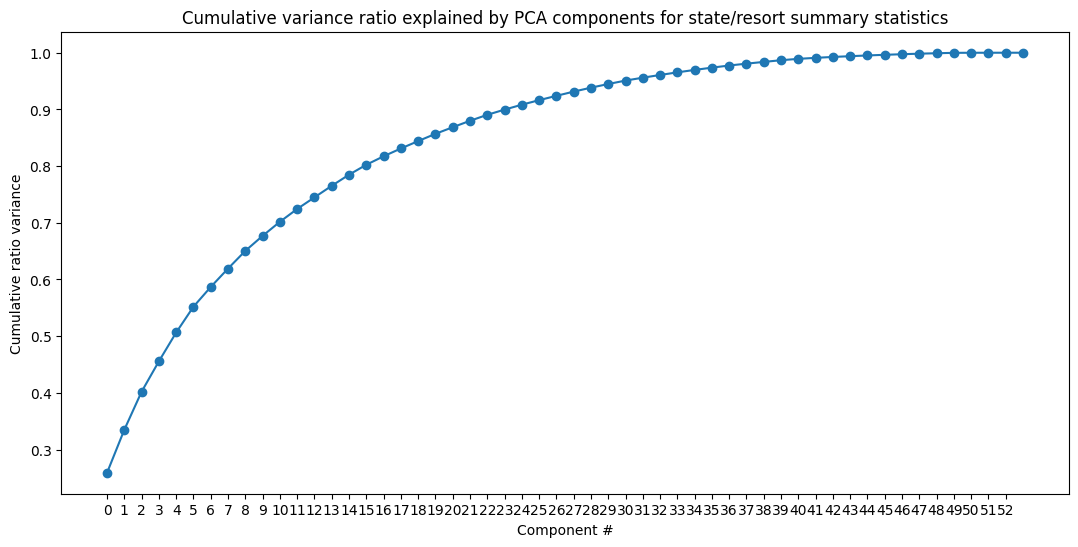

In [24]:
plt.subplots(figsize=(13, 6))
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Component #')
plt.xticks(ticks =np.arange(0,53))
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

In [25]:
# save data
df_dummy.to_csv('data/anime_df_preprocessed.csv', sep=',')

### Split data into train & test

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('rating', axis=1).values
y = df[['rating']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7980, 50), (3931, 50), (7980, 1), (3931, 1))